# Loan Approval

In [66]:
"Importing the libraries"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
"Reading the files"
df_train = pd.read_csv('train.csv')

In [4]:
train=df_train.copy()

# Q1. Does the Loan_status Depends on Education,Property Area and Dependents?¶


# Q2. Which gender's people are applying for more amount loan?


# Q3. Which type of customer's Credit_History is good?

In [5]:
"Viewing the data"
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
"Viewing if any null data is present"
train.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
#by analyzing we can see that there is no null in Loan_status and Education
"Filling the dummies value"
train=pd.concat([train,pd.get_dummies(train["Loan_Status"])],axis=1)

In [11]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,N,Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1


In [67]:
"Declaring the new variable and storing the train data"
df_1_new=train[["Education","N","Y"]]
df_2_new=train[["Property_Area","N","Y"]]
df_3_new=train[["Dependents","N","Y"]]

In [14]:
"Viewing the data"
df_1_new.head()

,Education,N,Y
0,Graduate,0,1
1,Graduate,1,0
2,Graduate,0,1
3,Not Graduate,0,1
4,Graduate,0,1


In [15]:
"Viewing the data"
df_2_new.head()

,Property_Area,N,Y
0,Urban,0,1
1,Rural,1,0
2,Urban,0,1
3,Urban,0,1
4,Urban,0,1


In [16]:
"Viewing the data"
df_3_new.head()

,Dependents,N,Y
0,0,0,1
1,1,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [19]:
"Groupby in  Education column"
e=df_1_new.groupby(["Education","N","Y"])
e=e.size().unstack()
e

Y                   0      1
Education    N              
Graduate     0    NaN  340.0
             1  140.0    NaN
Not Graduate 0    NaN   82.0
             1   52.0    NaN

In [20]:
"Replacing tha NAN value with zero"
e.replace(np.nan,0,inplace=True)
e

Y                   0      1
Education    N              
Graduate     0    0.0  340.0
             1  140.0    0.0
Not Graduate 0    0.0   82.0
             1   52.0    0.0

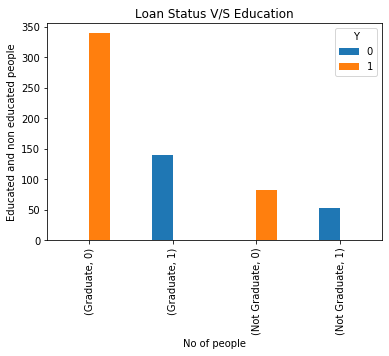

In [24]:
"Visualizing the graph"
e.plot(kind='bar').plot()
plt.title("Loan Status V/S Education")
plt.xlabel("No of people")
plt.ylabel("Educated and non educated people")
plt.show()

we can say that if the person is graduate then there is high cahnce of getting a loan

In [26]:
p=df_2_new.groupby(['Property_Area',"N","Y"])
p=p.size().unstack()
p

Y                   0      1
Property_Area N             
Rural         0   NaN  110.0
              1  69.0    NaN
Semiurban     0   NaN  179.0
              1  54.0    NaN
Urban         0   NaN  133.0
              1  69.0    NaN

In [27]:
p.replace(np.nan,0,inplace=True)

In [28]:
p

Y                   0      1
Property_Area N             
Rural         0   0.0  110.0
              1  69.0    0.0
Semiurban     0   0.0  179.0
              1  54.0    0.0
Urban         0   0.0  133.0
              1  69.0    0.0

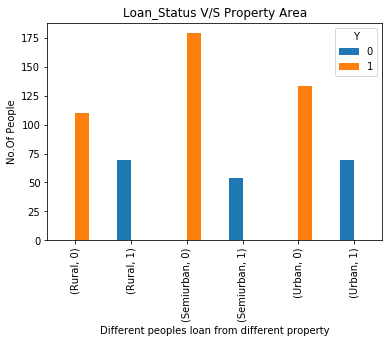

In [30]:
p.plot(kind="bar").plot()
plt.title("Loan_Status V/S Property Area")
plt.ylabel("No.Of People")
plt.xlabel("Different peoples loan from different property")
plt.show()

here we can see that the loan accepetance is high in Semiurban area


In [31]:
train["Dependents"].isnull().any()

True

In [32]:
miss_dept=(1-(train["Dependents"].count()/train.shape[0]))*100
miss_dept

2.442996742671011

In [33]:
df_3_new.dropna(axis=0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
d=df_3_new.groupby(["Dependents","N","Y"])
d=d.size().unstack()
d

Y                 0      1
Dependents N              
0          0    NaN  238.0
           1  107.0    NaN
1          0    NaN   66.0
           1   36.0    NaN
2          0    NaN   76.0
           1   25.0    NaN
3+         0    NaN   33.0
           1   18.0    NaN

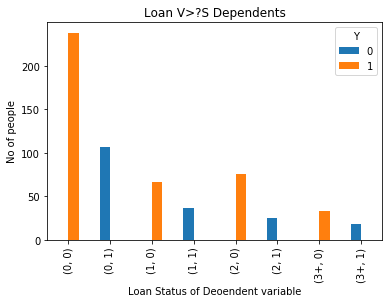

In [41]:
d.plot(kind="bar").plot()
plt.title("Loan V>?S Dependents")
plt.xlabel("Loan Status of Deoendent variable")
plt.ylabel("No of people")
plt.show()

# Which Gender peoples are applying more for loan

In [42]:
"Is there any null value"
train["Gender"].isnull().any()

True

In [43]:
miss_gender=(1-(train["Gender"].count()/train.shape[0]))*100
miss_gender

2.1172638436482094

we can either remove that data or fill it with the mode value

In [65]:
"Filling the data with mode"
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].mean(),inplace=True)

In [45]:
print(train["Gender"].isnull().any())
print(train["LoanAmount"].isnull().any())

False
False


In [46]:
df_2=train[["Gender","LoanAmount"]]
df_2.head()

,Gender,LoanAmount
0,Male,146.412162
1,Male,128.000000
2,Male,66.000000
3,Male,120.000000
4,Male,141.000000


In [48]:
x=pd.DataFrame(df_2.groupby(["Gender"])["LoanAmount"].mean())
x

,LoanAmount
Gender,
Female,127.225326
Male,150.692891


[]

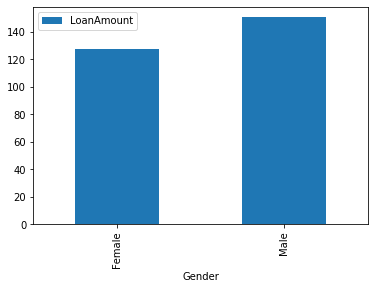

In [49]:
x.plot(kind='bar').plot()

There is no major difference between average loan of male and female

In [64]:
"There is no major difference between average loan of male and female"
train["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [52]:
train.count()

Loan_ID              614
Gender               614
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
N                    614
Y                    614
dtype: int64

In [53]:
miss_cred_hist = (1 - (train['Credit_History'].count()/train.shape[0]))*100
miss_cred_hist


8.143322475570036

there is 8.14% of data is the missing so we cannot delet thata data
we will replace it with mode value

In [54]:
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [55]:
train["Credit_History"].isnull().any()

False

In [57]:
x=train[["Gender","Credit_History"]]
x.head()

,Gender,Credit_History
0,Male,1.0
1,Male,1.0
2,Male,1.0
3,Male,1.0
4,Male,1.0


In [58]:
k_new=x.groupby(["Gender","Credit_History"])
k_dash=k_new.size().unstack()
k_dash

Credit_History,0.0,1.0
Gender,,
Female,17,95
Male,72,430


In [59]:
95/(17+95)

0.8482142857142857

In [60]:
430/(72+430)

0.8565737051792829

Female Credit History is 4% and male is 85%

[]

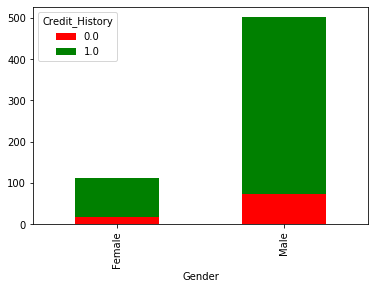

In [62]:
k_dash.plot(kind="bar",stacked="True",color=["red","green"]).plot()

male Credit Histry is high